<a href="https://colab.research.google.com/github/sakethyalamanchili/Handwritten_Digit_Classification_using_Neural_Network/blob/main/Handwritten_Digit_Classification_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digit Classification using Deep Learning (Neural Network)**

## Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
tf.random.set_seed(5)
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

**Simple explaination each import and its usage for your handwritten digit classification project:**
1. **pandas:** Data manipulation and analysis. It can be used for loading and preprocessing data if needed.
2. **numpy:** Numerical operations. Useful for working with arrays and matrices.
3. **matplotlib.pyplot:** Data visualization. Helps in visualizing data distributions, trends, and model performance.
4. **seaborn:** Enhanced data visualization library. Provides additional functionality for data visualization.
5. **tensorflow:** Deep learning library for building and training neural networks.
6. **cv2:** OpenCV library for image processing. Useful for loading, preprocessing, and manipulating images.
7. **google.colab.patches.cv2_imshow:** Function to display images in Google Colab notebooks using OpenCV.
8. **PIL.Image:** Python Imaging Library for working with images. Useful for loading and preprocessing images.
9. **keras:** High-level API for building and training neural networks. Integrated with TensorFlow.
10. **keras.datasets.mnist:** MNIST dataset for handwritten digit classification. It provides training and testing data.
11. **tensorflow.math.confusion_matrix:** Function for calculating the confusion matrix. Useful for evaluating model performance.

## Loads the MNIST dataset

This function loads the MNIST dataset, which consists of 60,000 training images and 10,000 test images of handwritten digits.

#### Arguments

- `path`: Path where to cache the dataset locally (relative to ~/.keras/datasets).

#### Returns

Tuple of NumPy arrays:

- `x_train`: Grayscale image data for training with shape (60000, 28, 28), containing pixel values ranging from 0 to 255.
- `y_train`: Digit labels for training data with shape (60000,), integers ranging from 0 to 9.
- `x_test`: Grayscale image data for testing with shape (10000, 28, 28), containing pixel values ranging from 0 to 255.
- `y_test`: Digit labels for test data with shape (10000,), integers ranging from 0 to 9.

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
type(X_train)

numpy.ndarray

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

The dimensions (28, 28) in the MNIST dataset represent the height and width of each grayscale image. Each image is a 28x28 grid of pixels, where each pixel's value ranges from 0 to 255, representing its intensity from black to white.

In [8]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         33, 151, 208, 252, 252, 252, 146,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 152,
        244, 252, 253, 224, 211, 252, 232,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  15, 152, 239, 252,
        252, 252, 216,  31,  37, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 252, 252, 252,
        252, 217,  29,   0,  37, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 181, 252, 252, 220,
        167,  30,   0,   0,  77, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 128,  58,  22,
          0,   0,   0,   0, 100, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 157, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        110, 121, 122, 121, 202, 252, 194,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  53, 179,
        253, 253, 255, 253, 253, 228,  35,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   5,  54, 227, 252, 243,
        228, 170, 242, 252, 252, 231, 117,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   6,  78, 252, 252, 125,  59,
          0,  18, 208, 252, 252, 252, 252,  87,   7,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   5, 135, 252, 252, 180,  16,   0,
         21, 203, 253, 247, 129, 173, 252, 252, 184,  66,  49,  49,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3, 136, 252, 241, 106,  17,   0,  53,
        200, 252, 216,  65,   0,  14,  72, 163, 241, 252, 252, 223,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 105, 252, 242,  88,  18,  73, 170, 244,
        252, 126,  29,   0,   0,   0,   0,   0,  89, 180, 180,  37,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 231, 252, 245, 205, 216, 252, 252, 252,
        124,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 207, 252, 252, 252, 252, 178, 116,  36,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  13,  93, 143, 121,  23,   6,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

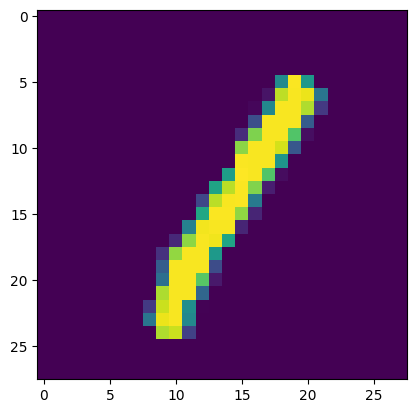


Digit: 1


In [9]:
plt.imshow(X_train[23])
plt.show()

print(f'\nDigit: {y_train[23]}')

## Image Labels

In [10]:
print(f"Unique Values of y_train: {np.unique(y_train)}")
print(f"Unique Values of y_test: {np.unique(y_test)}")

Unique Values of y_train: [0 1 2 3 4 5 6 7 8 9]
Unique Values of y_test: [0 1 2 3 4 5 6 7 8 9]


The task of classifying handwritten digits into their respective categories (0 to 9) falls under the category of multi-class classification. In multi-class classification, the algorithm predicts one out of multiple possible classes for each input data point. Each class is mutually exclusive, meaning that an input can belong to only one class. In digit classification, each handwritten digit image is classified into one of the ten possible classes, corresponding to the digits 0 through 9.

In [11]:
# Scaling the data

X_train = X_train/255
X_test = X_test/255

In [12]:
X_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Preparing the model

In [13]:
# Define the neural network model using Sequential API
model = tf.keras.Sequential([
    # Flatten layer to flatten the input data (28x28 images) into a 1D array
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # Dense hidden layer with 100 neurons and ReLU activation function
    tf.keras.layers.Dense(100, activation='relu'),
    # Output layer with 10 neurons (one for each digit) and sigmoid activation function
    tf.keras.layers.Dense(10, activation='sigmoid')
])

# Compile the model
model.compile(
    # Sparse categorical cross-entropy loss function for multi-class classification
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    # Adam optimizer for gradient descent
    optimizer=tf.keras.optimizers.Adam(),
    # List of metrics to evaluate model performance during training
    metrics=['accuracy']
)

# Train the model on training data
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2759 - accuracy: 0.9234
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1254 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0880 - accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0674 - accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0424 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0357 - accuracy: 0.9886
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0284 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0233 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

## Accuracy on Test Data

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9778


[0.08015429228544235, 0.9778000116348267]

> ***Training Data Accuracy: 99%***

> ***Testing Data Accuracy: 97%***

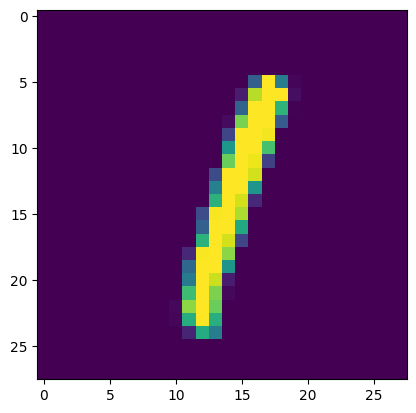

In [15]:
plt.imshow(X_test[5]);

In [16]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
np.argmax(y_pred[5])

1

In [18]:
for i in model.predict(X_test)[:2]:
  print(i)
  print(np.argmax(i))

313/313 [==============================] - 1s 2ms/step
[5.7541307e-05 5.9955073e-06 1.4939994e-01 7.2107959e-01 3.5646934e-07
 2.3442868e-04 4.6548081e-08 9.9999928e-01 6.4297966e-03 7.1311124e-02]
7
[6.3168966e-07 9.2253041e-01 9.9999869e-01 7.9433739e-02 3.6411090e-14
 3.5301596e-02 3.6658815e-03 2.8334473e-08 2.3906678e-01 1.3278223e-05]
2


In [19]:
y_pred = [np.argmax(i) for i in y_pred]

In [20]:
print(y_pred)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 3, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [21]:
conf_mtx = confusion_matrix(y_test, y_pred)
conf_mtx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    4,    0,    3,    0,    5,    1,    2,    0],
       [   0, 1128,    2,    0,    0,    1,    3,    0,    1,    0],
       [   5,    5, 1001,    2,    3,    0,    2,    8,    6,    0],
       [   0,    0,    6,  986,    0,    3,    0,    5,    2,    8],
       [   0,    0,    1,    0,  954,    0,    8,    2,    0,   17],
       [   2,    1,    0,    7,    0,  870,    5,    1,    2,    4],
       [   4,    2,    2,    1,    3,    3,  942,    0,    0,    1],
       [   0,    4,    9,    1,    1,    0,    0, 1006,    2,    5],
       [   1,    1,    5,    6,    5,    1,    2,    4,  942,    7],
       [   2,    6,    0,    3,    9,    3,    0,    2,    0,  984]],
      dtype=int32)>

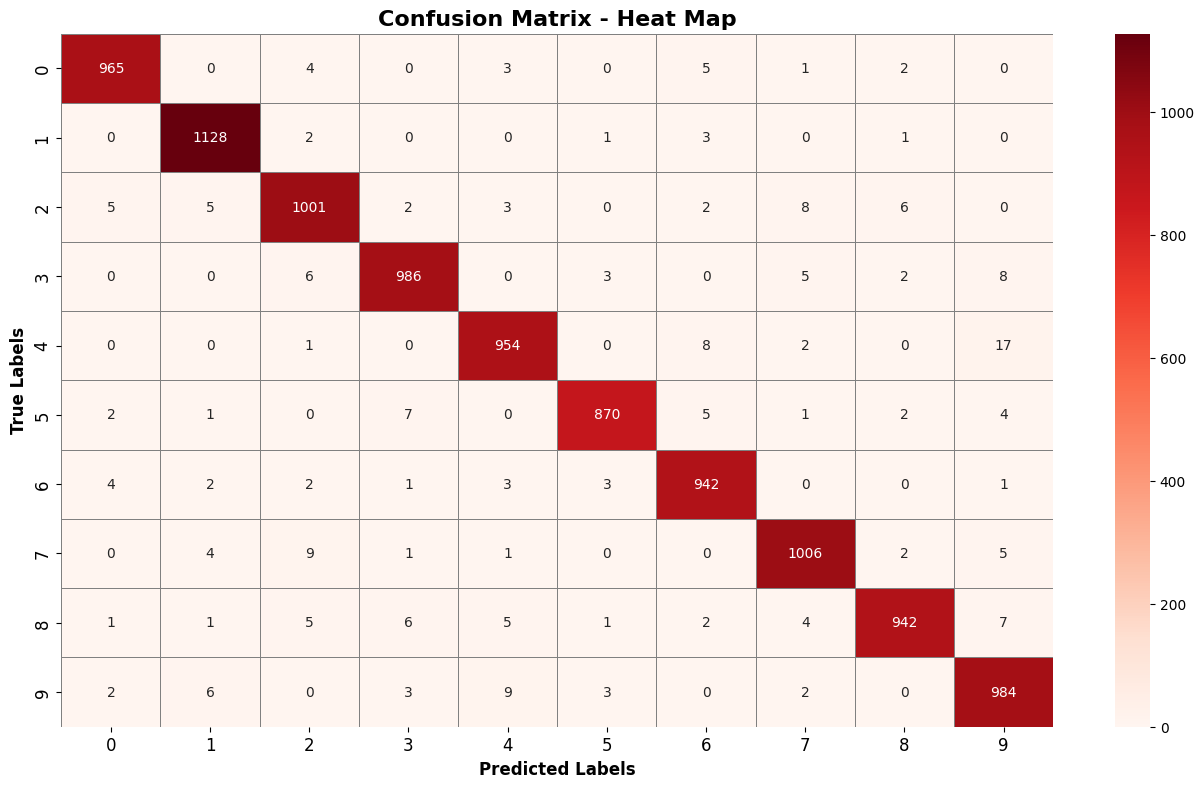

In [22]:
# Set the figure size for the heatmap
plt.figure(figsize=(16, 9))

# Create a heatmap of the confusion matrix
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap='Reds', linewidths=0.5, linecolor='gray')

# Set the title and axis labels
plt.title('Confusion Matrix - Heat Map', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Labels', fontsize=12, fontweight='bold')
plt.ylabel('True Labels', fontsize=12, fontweight='bold')

# Adjust the font size of the annotations
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Display the heatmap
plt.show()

## Predict - Custom Data

In [89]:
custom_image_path = 'drive/MyDrive/project_images_MLAIDS/custom_number.png'
custom_image = cv2.imread(custom_image_path)

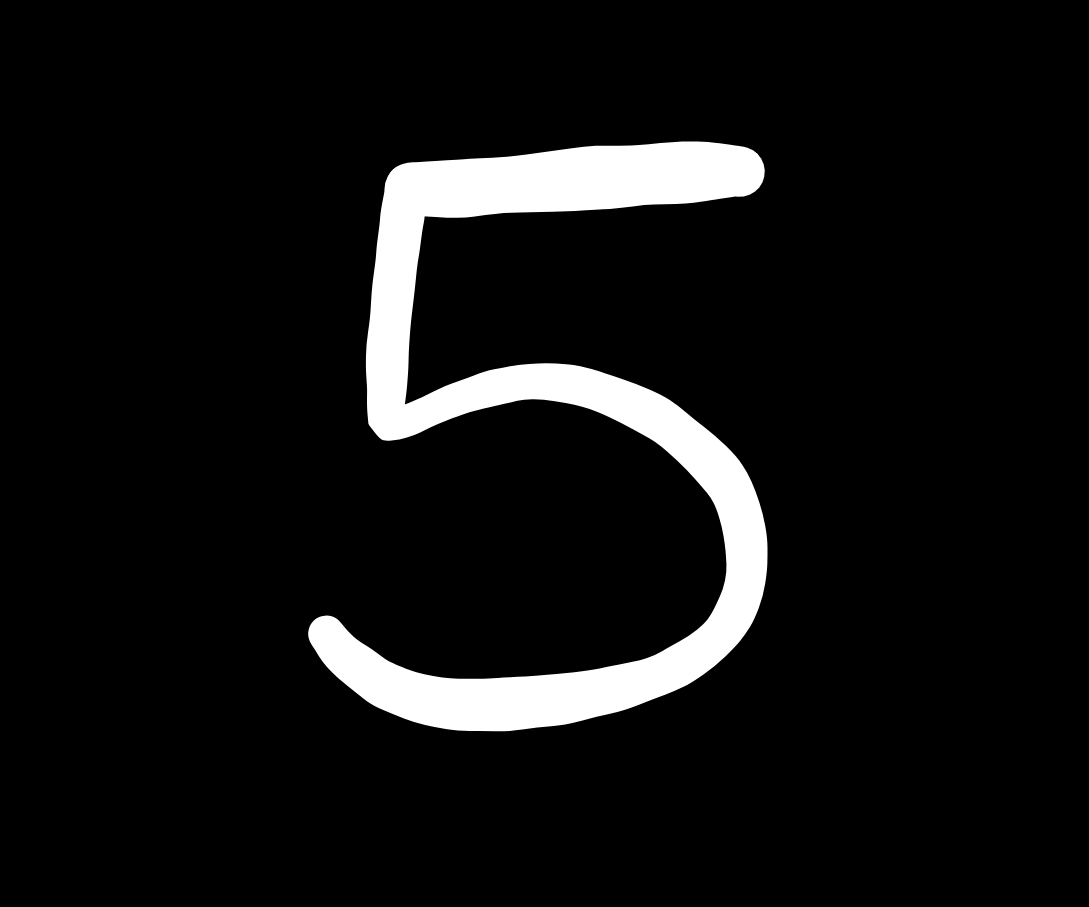

In [90]:
cv2_imshow(custom_image)

In [91]:
custom_image.shape

(907, 1089, 3)

In [92]:
grayscale = cv2.cvtColor(custom_image, cv2.COLOR_RGB2GRAY)
grayscale

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [93]:
grayscale.shape

(907, 1089)

In [94]:
custom_image_resize = cv2.resize(grayscale, (28,28))
custom_image_resize

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 115, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 246,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255,  46,   0, 255,
        255, 255, 115,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
          0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55,   0,   0,
          0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 255, 252,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 254, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,
          0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
        255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 191, 255,
        180,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [95]:
input_image = custom_image_resize/255
input_image.shape

(28, 28)

In [96]:
input_image = tf.expand_dims(input_image, axis = 0)
input_image.shape

TensorShape([1, 28, 28])

In [101]:
cv2_imshow(custom_image_resize)

In [102]:
prediction = model.predict(input_image)
np.argmax(prediction)

1/1 [==============================] - 0s 31ms/step


5

Our model has successfully predicted the custom handwritten digit '5' with the expected result '5', indicating its effectiveness. This suggests that our model is performing well and accurately recognizing handwritten digits. This outcome validates the model's capability and demonstrates its reliability in digit classification tasks.